In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import math

In [4]:
# read the dataset
retail_df = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [6]:
retail_df = retail_df.loc[:,["Player","Ave","SR"]]

In [7]:
retail_df.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [8]:
final = retail_df.drop("Player",axis=1)

In [9]:
final

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96
...,...,...
74,45.03,64.92
75,43.40,73.75
76,35.36,76.98
77,39.75,92.44


In [10]:
# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(final)
rfm_df_scaled.shape

(79, 2)

In [12]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Ave', 'SR']
rfm_df_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [13]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4, random_state=100)

In [16]:
# assign the label
retail_df['cluster_id'] = kmeans.labels_

<AxesSubplot:xlabel='cluster_id', ylabel='Ave'>

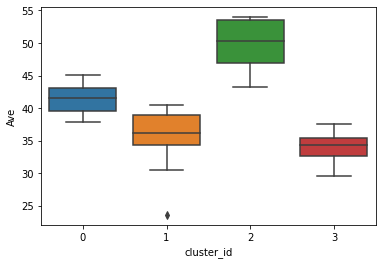

In [35]:
sns.boxplot(x='cluster_id', y='Ave', data=retail_df)

<AxesSubplot:xlabel='cluster_id', ylabel='SR'>

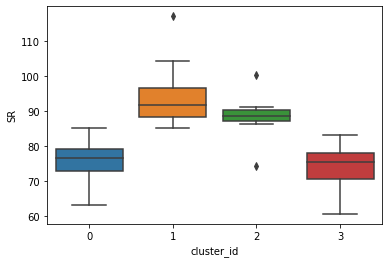

In [36]:
sns.boxplot(x='cluster_id', y='SR', data=retail_df)

1. 0. Low SR High Avg - D
2. 1. High SR Low Avg - C
3. 2 - High SR High Avg - A 
4. 3 - Low Avg and Low str - B

In [37]:
retail_df['cluster_id'] = retail_df['cluster_id'].map({0:'D',1:'C',2:'A',3:'B'})

In [39]:
retail_df.loc[retail_df["cluster_id"]=='A',:]

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,A
13,MS Dhoni (Asia/INDIA),51.32,88.69,A
15,AB de Villiers (Afr/SA),53.55,100.25,A
25,V Kohli (INDIA),53.94,90.99,A
34,HM Amla (SA),50.25,89.05,A
38,MG Bevan (AUS),53.58,74.16,A
42,IVA Richards (WI),47.00,90.20,A
63,MJ Guptill (NZ),43.30,87.73,A
64,MEK Hussey (AUS),48.15,87.16,A


In [3]:
# read the dataset
retail_df = pd.read_csv("graded.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,Point Label,X,Y
0,A,6,0
1,B,1,2
2,C,2,7
3,D,4,6
4,E,5,3


In [5]:
math.sqrt((4**2)+1)

4.123105625617661

In [19]:
retail_df.set_index('Point Label',inplace=True)
retail_df

,X,Y
Point Label,,
A,6,0
B,1,2
C,2,7
D,4,6
E,5,3
F,11,1


In [31]:
(retail_df.loc['B',['X']] - retail_df.loc['E',['X']])**2

X    16
dtype: int64

In [17]:
retail_df.loc[retail_df['Point Label']=='E',['X']]

,X
4,5
